<a href="https://colab.research.google.com/github/Cynthiaudoye/Forex_Trading_Bot/blob/main/Cynthia's_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
# Reading the data into the dataframe
fx_df = pd.read_csv("/content/GBPUSD=X.csv")

# Displaying the first few rows
fx_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-16,1.284588,1.285512,1.279034,1.284752,1.284752,0.0
1,2019-05-17,1.279787,1.279918,1.272135,1.279771,1.279771,0.0
2,2019-05-20,1.273026,1.275754,1.271682,1.273156,1.273156,0.0
3,2019-05-21,1.272783,1.279427,1.268617,1.272912,1.272912,0.0
4,2019-05-22,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
# Retrieving the number of rows and columns in the dataset
rows, columns = fx_df.shape
rows, columns

(1306, 7)

In [222]:
# Generating summary statistics for the dataset
summary_stats = fx_df.describe()
summary_stats

,Open,High,Low,Close,Adj Close,Volume
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.0
mean,1.280674,1.285291,1.275696,1.280685,1.280685,0.0
std,0.066306,0.065505,0.067060,0.066307,0.066307,0.0
min,1.072846,1.083541,1.037904,1.072754,1.072754,0.0
25%,1.235224,1.241372,1.230497,1.235361,1.235361,0.0
50%,1.270923,1.274372,1.266608,1.270987,1.270987,0.0
75%,1.330070,1.334999,1.324135,1.329999,1.329999,0.0
max,1.422758,1.424725,1.416591,1.422678,1.422678,0.0


In [223]:
# Getting an overview of the DataFrame structure, data types, and detect missing values
fx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1306 non-null   object 
 1   Open       1305 non-null   float64
 2   High       1305 non-null   float64
 3   Low        1305 non-null   float64
 4   Close      1305 non-null   float64
 5   Adj Close  1305 non-null   float64
 6   Volume     1305 non-null   float64
dtypes: float64(6), object(1)
memory usage: 71.5+ KB


In [224]:
# Just to reconfirm the missing values in dataframe
print(fx_df.isnull().sum())

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [225]:
# Removing rows with the NaN values, 'Volume' and 'Adj Close' columns and reconfirming number of rows and columns in the dataset
fx_cleaned_df = fx_df.dropna()
fx_cleaned_df = fx_cleaned_df.drop(columns=['Volume', 'Adj Close'])

fx_cleaned_df.shape

(1305, 5)

In [226]:
# Displaying the first few rows of the cleaned dataframe
fx_cleaned_df.head()

,Date,Open,High,Low,Close
0,2019-05-16,1.284588,1.285512,1.279034,1.284752
1,2019-05-17,1.279787,1.279918,1.272135,1.279771
2,2019-05-20,1.273026,1.275754,1.271682,1.273156
3,2019-05-21,1.272783,1.279427,1.268617,1.272912
5,2019-05-23,1.266336,1.268343,1.260589,1.266416


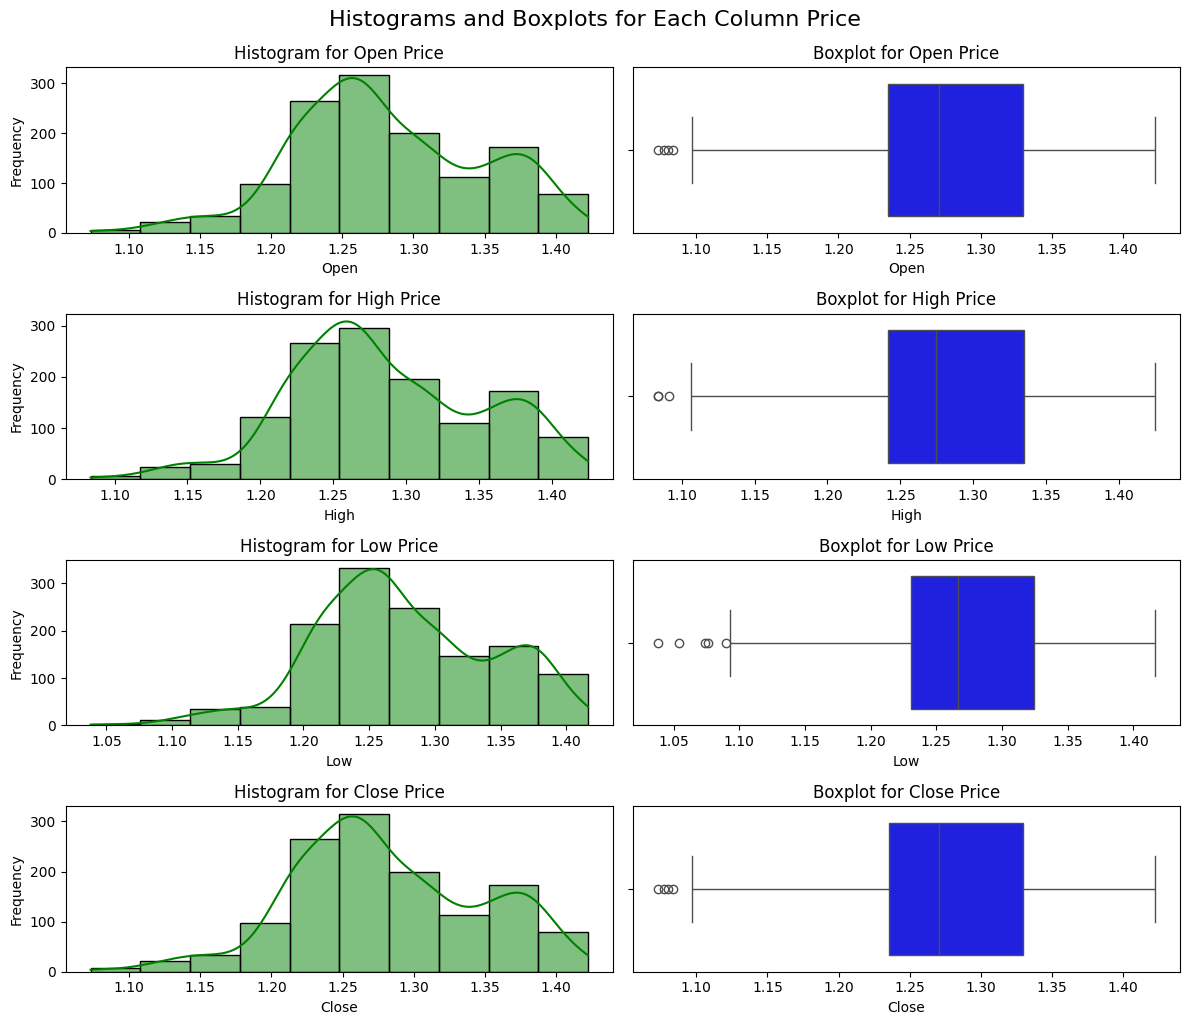

In [227]:
# Creating a figure and a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))

# Defining the columns for histograms
numeric_columns = ['Open', 'High', 'Low', 'Close']

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Looping through the numeric columns and then creating a histogram and boxplot for each
for i, col in enumerate(numeric_columns):
    sns.histplot(fx_cleaned_df[col], kde=True, color='green', bins=10, ax=axes[2*i])
    axes[2*i].set_xlabel(col.capitalize())
    axes[2*i].set_ylabel('Frequency')
    axes[2*i].set_title(f"Histogram for {col.capitalize()} Price")


    sns.boxplot(x=fx_cleaned_df[col], ax=axes[2*i+1], color='blue')
    axes[2*i+1].set_xlabel(col.capitalize())
    axes[2*i+1].set_title(f"Boxplot for {col.capitalize()} Price")

# Adjusting layout for better spacing between plots
plt.tight_layout()

# Adding main title for the entire figure
plt.suptitle("Histograms and Boxplots for Each Column Price", fontsize=16, y=1.02)

# Displaying the plot
plt.show()

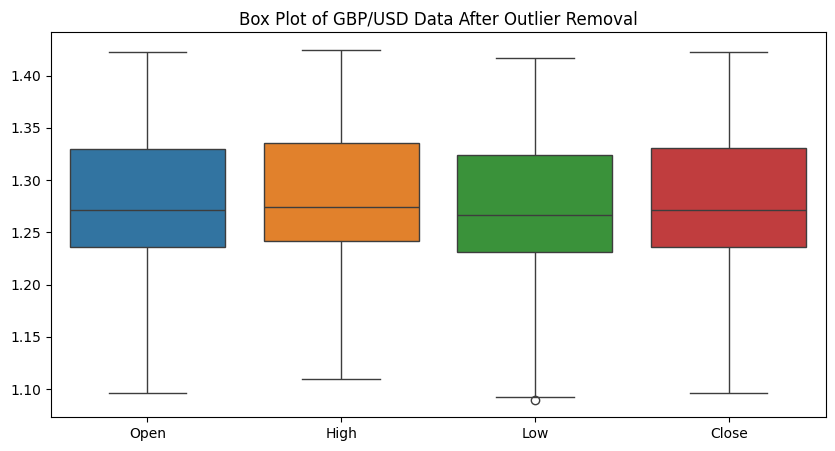

In [228]:
# Defining a function to remove outliers using IQR
def remove_outliers_iqr(fx_cleaned_df, columns):

  """
    Removes outliers from specified columns in a DataFrame using the IQR method.

    Parameters:
    fx_cleaned_df: The DataFrame containing the data.
    columns (list): A list of column names from which to remove outliers.

    Returns:
    fx_cleaned_df2: A new DataFrame with outliers removed from the specified columns.
    """

  for column in columns:
        Q1 = fx_cleaned_df[column].quantile(0.25)
        Q3 = fx_cleaned_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        fx_cleaned_df2 = fx_cleaned_df[(fx_cleaned_df[column] >= lower_bound) & (fx_cleaned_df[column] <= upper_bound)]
  return fx_cleaned_df2

# Applying the function to the price columns
price_columns = ['Open', 'High', 'Low', 'Close']
fx_cleaned_df2 = remove_outliers_iqr(fx_cleaned_df, price_columns).copy()

# Visualizing the data after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=fx_cleaned_df2[price_columns])
plt.title('Box Plot of GBP/USD Data After Outlier Removal')
plt.show()

In [229]:
# Retrieving the number of rows and columns in the new dataframe after removing outliers
rows, columns = fx_cleaned_df2.shape
rows, columns

(1301, 5)

In [230]:
# Generating summary statistics for the new GBP/USD data
summary_stats = fx_cleaned_df2.describe()
summary_stats

,Open,High,Low,Close
count,1301.000000,1301.000000,1301.000000,1301.000000
mean,1.281296,1.285887,1.276357,1.281308
std,0.065449,0.064713,0.066086,0.065451
min,1.096780,1.109866,1.089859,1.096780
25%,1.235559,1.241758,1.230936,1.235666
50%,1.271197,1.274535,1.266641,1.271133
75%,1.330230,1.335113,1.324310,1.330513
max,1.422758,1.424725,1.416591,1.422678


In [231]:
# Calculate Exponential Moving Averages (EMA)
fx_cleaned_df2.loc[:, 'EMA_50'] = fx_cleaned_df2['Close'].ewm(span=50, adjust=False).mean()
fx_cleaned_df2.loc[:, 'EMA_200'] = fx_cleaned_df2['Close'].ewm(span=200, adjust=False).mean()
fx_cleaned_df2.head()

,Date,Open,High,Low,Close,EMA_50,EMA_200
0,2019-05-16,1.284588,1.285512,1.279034,1.284752,1.284752,1.284752
1,2019-05-17,1.279787,1.279918,1.272135,1.279771,1.284557,1.284702
2,2019-05-20,1.273026,1.275754,1.271682,1.273156,1.284110,1.284588
3,2019-05-21,1.272783,1.279427,1.268617,1.272912,1.283670,1.284471
5,2019-05-23,1.266336,1.268343,1.260589,1.266416,1.282994,1.284292


In [232]:
fx_cleaned_df2.shape

(1301, 7)